# Belarus Car Price Prediction

## 📌 Project Overview
This project aims to **predict car prices** in Belarus by analyzing various car features. By using **machine learning techniques**, we seek to understand which attributes most influence the price of a car.

## 🔍 Features Considered
The model takes into account the following variables:
- 🚗 **Brand**
- 📅 **Year of manufacture**
- 🔧 **Engine size**
- ⛽ **Fuel type**
- ⚙ **Transmission type**
- 📏 **Mileage**
- 🏎 **Drive unit (FWD, RWD, AWD)**
- 🎨 **Color**
- 🏆 **Car segment (SUV, Sedan, etc.)**

## 📊 Dataset
The dataset used in this project has been sourced from **Kaggle**. It consists of **56,244 rows** and **12 columns**, containing detailed car listings with various attributes. The dataset will be **preprocessed**, and **exploratory data analysis (EDA)** will be conducted before applying machine learning models.

## 🎯 Goals
✔ Build a **predictive model** to estimate car prices based on given attributes.
✔ Identify which **features** have the most significant impact on price.
✔ Provide **insights** into price trends and factors affecting car valuation in Belarus.

## 🛠 Tools & Environment
- 🖥 **Google Colab** (for development and execution)
- 🐍 **Python** (for data analysis and modeling)
- 📊 **Pandas & NumPy** (for data manipulation)
- 📉 **Matplotlib & Seaborn** (for visualization)
- 🤖 **Scikit-learn** (for machine learning modeling)

This project will leverage **supervised learning techniques** to develop an **accurate pricing model** and offer insights into the **Belarusian car market**.



## Data Dictionary

| Variable | Description |
| --- | --- |
| make| machine firm |
| model| machine model |
|price USD| price in USD (target variable)|
| year| year of production|
| condition| represents the condition at the sale moment (with mileage, for parts, etc)|
| mileage| mileage in kilometers|
| fuel type| type of the fuel (electro, petrol, diesel)|
| volume(cm3)| volume of the engine in cubic centimeters|
| color| color of the car|
| transmission| type of transmission|
| drive unit| drive unit|
| segment| segment of the car|

In [ ]:
# Loading the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [42]:
# Loading the dataset
df = pd.read_csv('/cars.csv')
df.head()

,make,model,priceUSD,year,condition,mileage(kilometers),fuel_type,volume(cm3),color,transmission,drive_unit,segment
0,mazda,2,5500,2008,with mileage,162000.0,petrol,1500.0,burgundy,mechanics,front-wheel drive,B
1,mazda,2,5350,2009,with mileage,120000.0,petrol,1300.0,black,mechanics,front-wheel drive,B
2,mazda,2,7000,2009,with mileage,61000.0,petrol,1500.0,silver,auto,front-wheel drive,B
3,mazda,2,3300,2003,with mileage,265000.0,diesel,1400.0,white,mechanics,front-wheel drive,B
4,mazda,2,5200,2008,with mileage,97183.0,diesel,1400.0,gray,mechanics,front-wheel drive,B


## Data Preprocessing

In [4]:
df.shape

(56244, 12)

In [9]:
df.dtypes

,0
make,object
model,object
priceUSD,int64
year,int64
condition,object
mileage(kilometers),float64
fuel_type,object
volume(cm3),float64
color,object
transmission,object


In [15]:
# Unique values in the columns
df.nunique()

,0
make,96
model,1034
priceUSD,2970
year,78
condition,3
mileage(kilometers),8400
fuel_type,3
volume(cm3),458
color,13
transmission,2


In [43]:
# drop columns, which are not needed
df.drop(['model', 'segment'], axis=1, inplace=True)

Since there are numerous car manufacturers, making individual analysis challenging, I will categorize them as follows: Luxury European, Mainstream European, Russian/Eastern European, Asian, American, Specialty, and Other. This classification is based on the manufacturer and its country of origin.

In [44]:
# Categorizing the car make
def car_make(make):
    if make in ['mazda', 'mg', 'rover','alfa-romeo', 'audi', 'peugeot', 'chrysler', 'bmw', 'aston-martin','jaguar', 'land-rover']:
        return 'Luxury European'
    elif make in ['renault','dacia', 'citroen', 'volvo', 'fiat', 'opel', 'seat', 'volkswagen', 'citroen', 'skoda', 'mini', 'smart' ]:
        return 'Mainstream European'
    elif make in ['gaz', 'aro', 'lada-vaz', 'izh', 'raf', 'bogdan', 'moskvich', 'uaz', 'luaz', 'wartburg', 'trabant', 'proton', 'fso', 'jac', 'iran-khodro', 'zotye', 'tagaz', 'saipa', 'brilliance']:
        return 'Russian/Eastern European'
    elif make in ['toyota', 'nissan','asia', 'mitsubishi', 'chery', 'hyundai', 'honda', 'ssangyong', 'suzuki', 'daihatsu', 'kia', 'changan', 'lexus', 'isuzu', 'great-wall', 'daewoo', 'vortex', 'infiniti', 'byd', 'geely', 'haval', 'acura', 'scion', 'tata', 'datsun', 'ravon', 'proton', 'jac']:
        return 'Asian'
    elif make in ['oldsmobile', 'gmc', 'chrysler', 'plymouth', 'ford', 'cadillac', 'jeep', 'mercury', 'lincoln', 'buick', 'saturn', 'pontiac', 'chevrolet']:
        return 'American'
    elif make in ['porsche','bentley', 'maserati', 'tesla', 'mclaren']:
        return 'Specialty'
    else:
        return 'Other'

df['make_segment'] = df['make'].apply(car_make)
df.head()

,make,priceUSD,year,condition,mileage(kilometers),fuel_type,volume(cm3),color,transmission,drive_unit,make_segment
0,mazda,5500,2008,with mileage,162000.0,petrol,1500.0,burgundy,mechanics,front-wheel drive,Luxury European
1,mazda,5350,2009,with mileage,120000.0,petrol,1300.0,black,mechanics,front-wheel drive,Luxury European
2,mazda,7000,2009,with mileage,61000.0,petrol,1500.0,silver,auto,front-wheel drive,Luxury European
3,mazda,3300,2003,with mileage,265000.0,diesel,1400.0,white,mechanics,front-wheel drive,Luxury European
4,mazda,5200,2008,with mileage,97183.0,diesel,1400.0,gray,mechanics,front-wheel drive,Luxury European


In [45]:
df.describe()

,priceUSD,year,mileage(kilometers),volume(cm3)
count,56244.000000,56244.000000,5.624400e+04,56197.000000
mean,7415.456440,2003.454840,2.443956e+05,2104.860615
std,8316.959261,8.144247,3.210307e+05,959.201633
min,48.000000,1910.000000,0.000000e+00,500.000000
25%,2350.000000,1998.000000,1.370000e+05,1600.000000
50%,5350.000000,2004.000000,2.285000e+05,1996.000000
75%,9807.500000,2010.000000,3.100000e+05,2300.000000
max,235235.000000,2019.000000,9.999999e+06,20000.000000


In the exploratory data analysis, I will examine the relationship between the target variable and the independent variables. Additionally, I will explore the relationships among the independent variables. This analysis will provide a deeper understanding of the data and help identify the variables that have the most significant impact on the target variable.

## Car Make Segment

([0, 1, 2, 3, 4, 5, 6],
 [Text(0, 0, 'Luxury European'),
  Text(1, 0, 'Mainstream European'),
  Text(2, 0, 'Russian/Eastern European'),
  Text(3, 0, 'American'),
  Text(4, 0, 'Other'),
  Text(5, 0, 'Specialty'),
  Text(6, 0, 'Asian')])

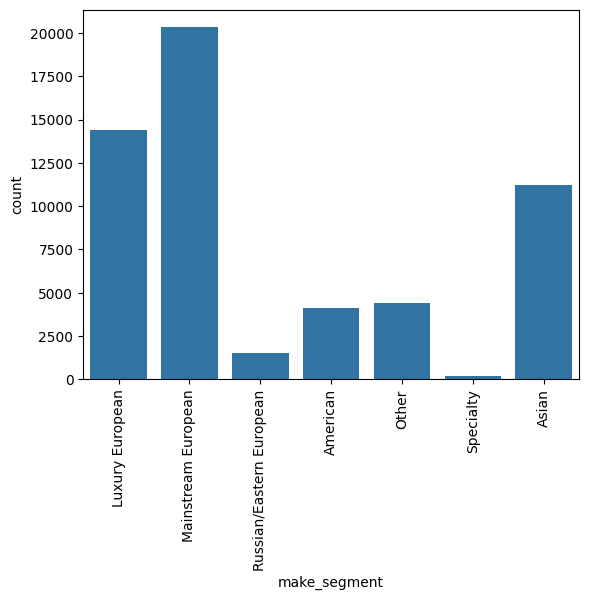

In [48]:
sns.countplot(x='make_segment', data=df)
plt.xticks(rotation=90)

In the dataset, most cars are European, with the majority being Luxury, followed by Mainstream and Russian/Eastern European. However, the dataset also includes American and Asian cars. Additionally, there are specialty cars such as Tesla, McLaren, and Bentley. Some cars in the dataset do not fall into any of the above categories.

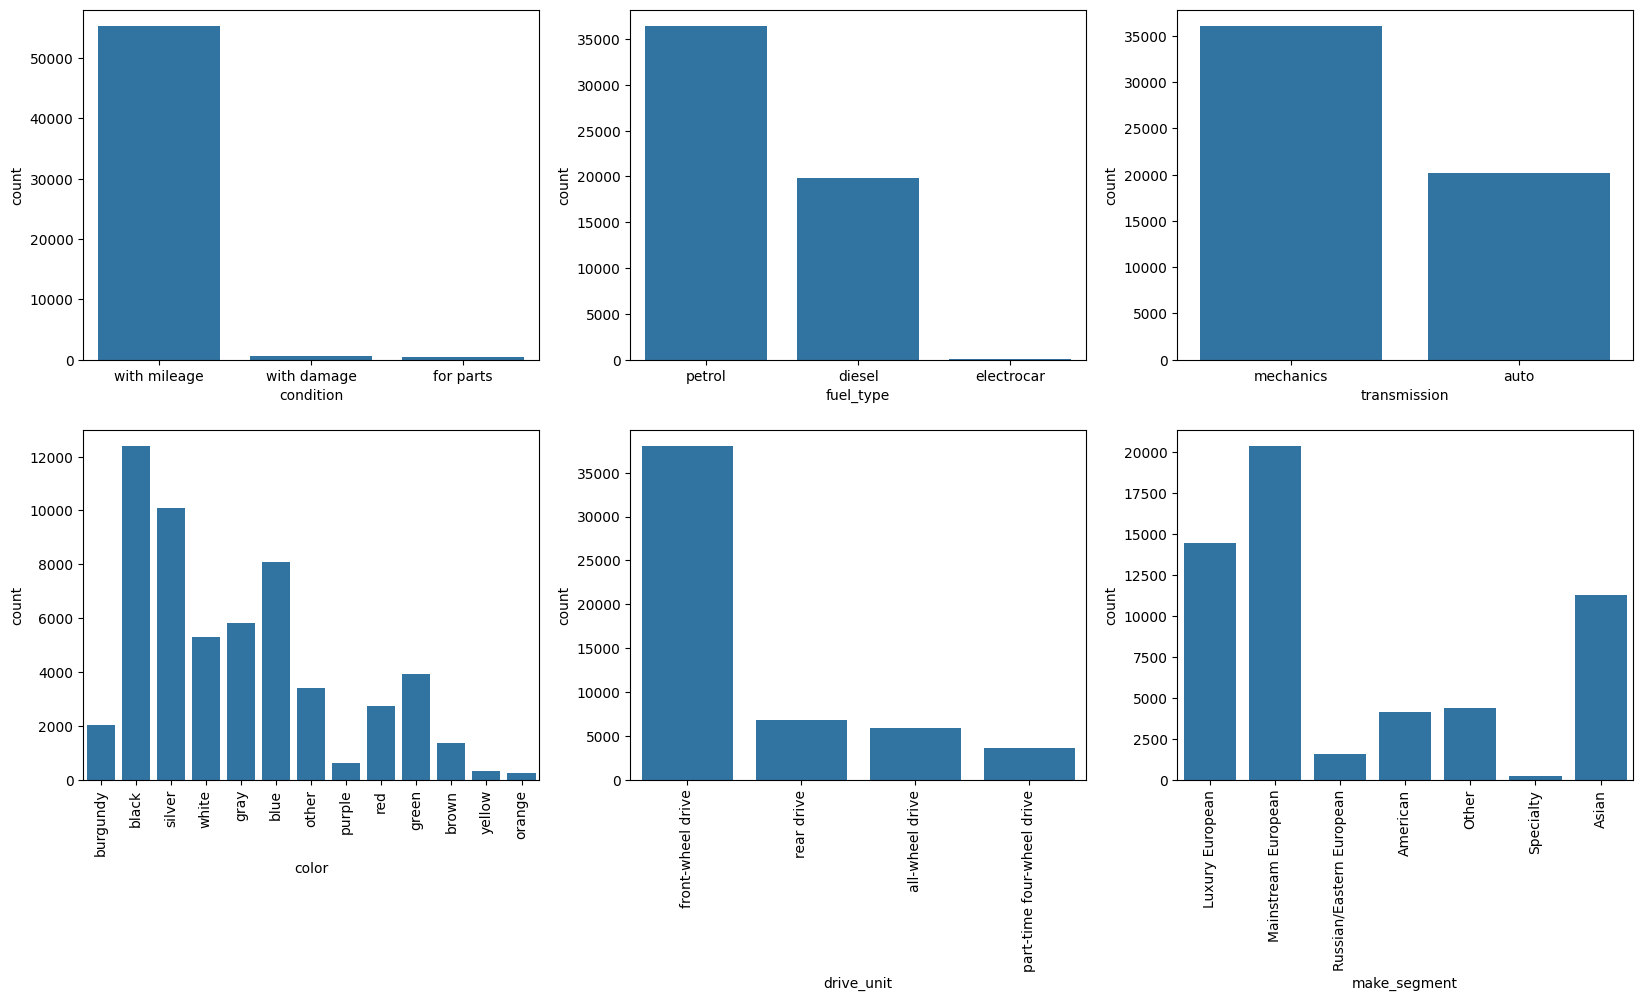

In [47]:
fig, ax = plt.subplots(2,3,figsize=(20,10))
sns.countplot(x='condition', data=df, ax=ax[0,0])
sns.countplot(x='fuel_type', data=df, ax=ax[0,1])
sns.countplot(x='transmission', data=df, ax=ax[0,2])
sns.countplot(x='color', data=df, ax=ax[1,0])
ax[1,0].tick_params(axis='x', rotation=90)
sns.countplot(x='drive_unit', data=df, ax=ax[1,1])
ax[1,1].tick_params(axis='x', rotation=90)
sns.countplot(x='make_segment', data=df, ax=ax[1,2])
ax[1,2].tick_params(axis='x', rotation=90)

From the graphs above, we can gain an overview of the distribution of categorical variables in the dataset. It is evident that the majority of the cars being sold are in working condition. Most of them run on petrol, followed by diesel, with very few electric vehicles. Additionally, the majority of the cars have manual transmissions and front-wheel drive. Common car colors include black, silver, blue, white, and grey.

<Axes: xlabel='volume(cm3)', ylabel='Count'>

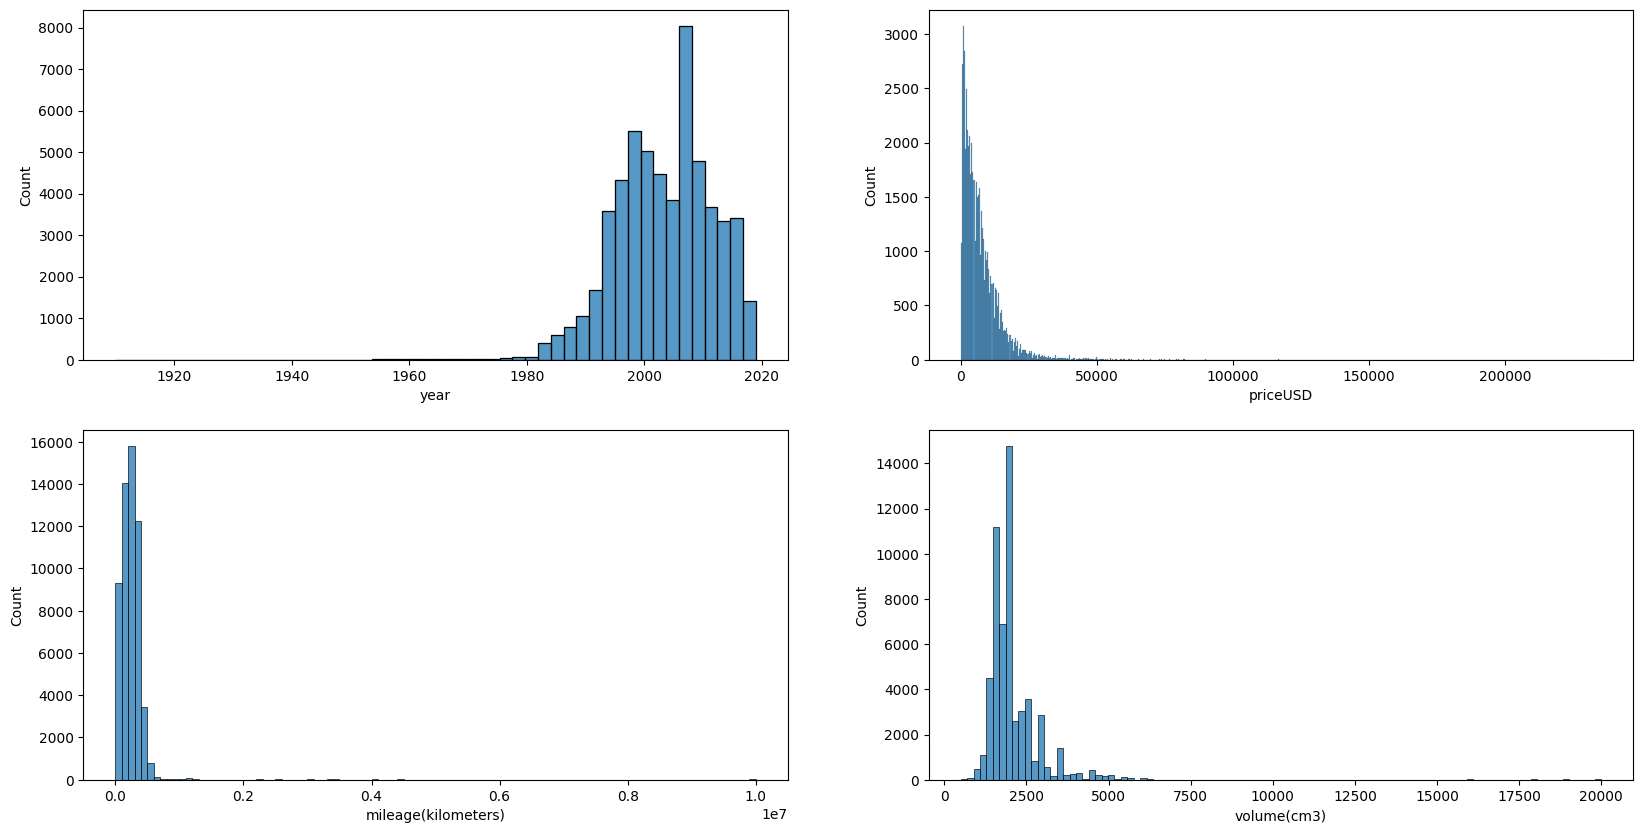

In [49]:
fig, ax = plt.subplots(2,2,figsize=(20,10))
sns.histplot (df['year'], ax=ax[0,0], bins = 50)
sns.histplot(df['priceUSD'], ax=ax[0,1])
sns.histplot(df['mileage(kilometers)'], ax=ax[1,0], bins = 100)
sns.histplot(df['volume(cm3)'], ax=ax[1,1], bins = 100)

The above graphs shows the distribution of the data across continuous variables. Majority of the cars are manufactured between 1990 to 2019,having price less than 50k USD, mileage less than 1 million km, engine volume between 1750 to 2000 cm3.

Since most of the cars are manufactured after 1980, so I will only consider the cars manufactured after 1980.


In [51]:
df= df[df['year']>1980]

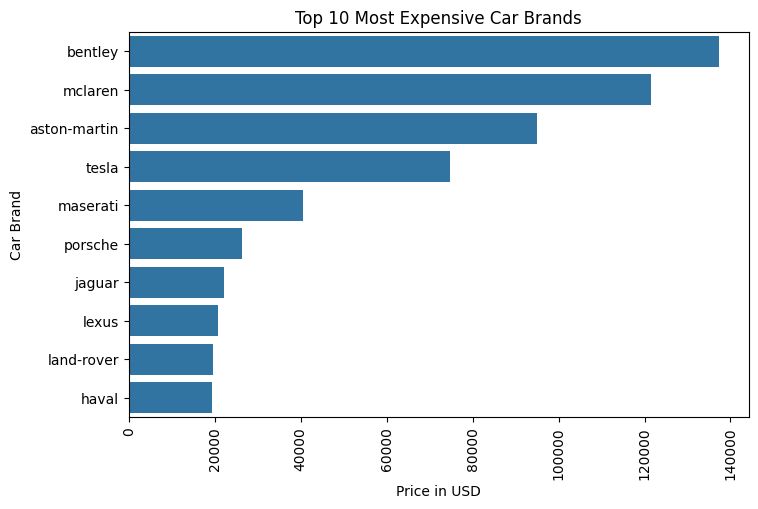

In [52]:
demodf = df.groupby('make')['priceUSD'].mean().reset_index()
demodf = demodf.sort_values(by='priceUSD', ascending=False).head(10)

#b Bar Plot
plt.figure(figsize=(8,5))
sns.barplot(y='make', x='priceUSD', data=demodf)
plt.xticks(rotation=90)
plt.title('Top 10 Most Expensive Car Brands')
plt.ylabel('Car Brand')
plt.xlabel('Price in USD')
plt.show()

## **Price and Condition**

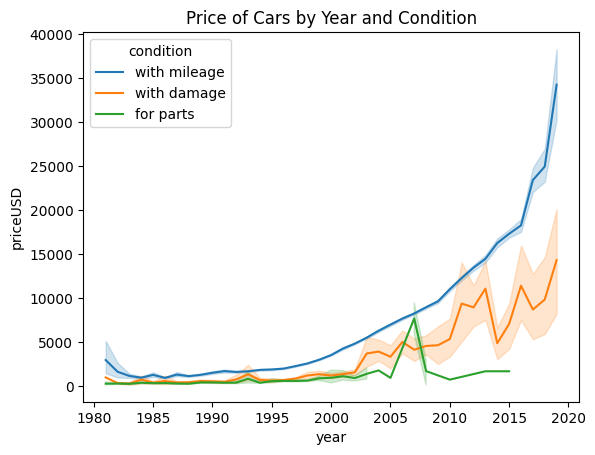

In [53]:
sns.lineplot(x = 'year', y = 'priceUSD', data = df, hue = 'condition')
plt.title('Price of Cars by Year and Condition')
plt.show()

The cars running on petrol and diesel have similar mileage, however their prices are quite different. The cars running on petrol tend to have higher price than the diesel ones. The cars running on electricity tend to have very high prices and low mileage

# **Price and Transmission**

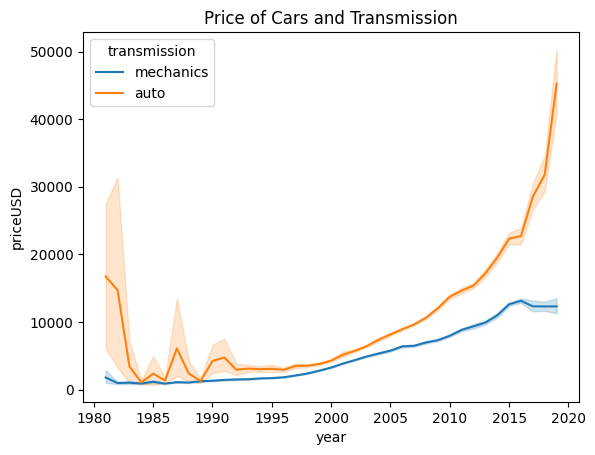

In [54]:
sns.lineplot(x = 'year', y = 'priceUSD', data = df, hue = 'transmission')
plt.title('Price of Cars and Transmission')
plt.show()

However, the price of the cars with manual transmission is always less than the cars with automatic transmission showing similar increase in price after 2000.

# **Price and Fuel Type**

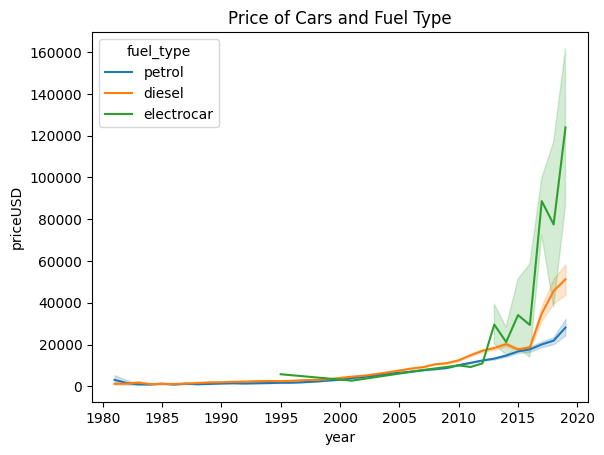

In [55]:
sns.lineplot(x = 'year', y = 'priceUSD', data = df, hue = 'fuel_type')
plt.title('Price of Cars and Fuel Type')
plt.show()

The price of the electro cars increases exponentially after 2015, having the highest car price based on fuel type

# **Price and Drive Unit**

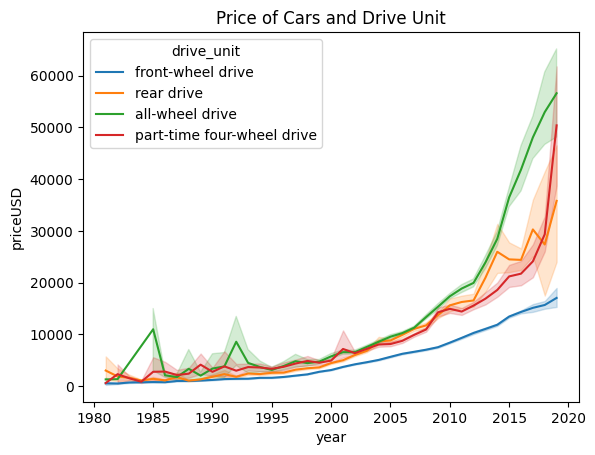

In [56]:
sns.lineplot(x = 'year', y = 'priceUSD', data = df, hue = 'drive_unit')
plt.title('Price of Cars and Drive Unit')
plt.show()

The price of the cats with all wheel drive increased significantly after 2005, having the highest price among all the drive units, followed by part-time four wheel drive and rear wheel drive.

# **Price and brand segment**

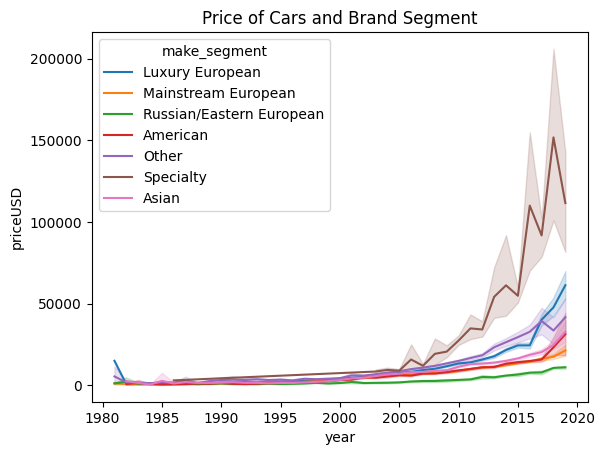

In [57]:
sns.lineplot(x = 'year', y = 'priceUSD', data = df, hue = 'make_segment')
plt.title('Price of Cars and Brand Segment')
plt.show()

The price of the Russian/Eastern European car segment increased at a slower pace as compared to other segments and is lowest among all the segments.

# **Data Preprocessing**

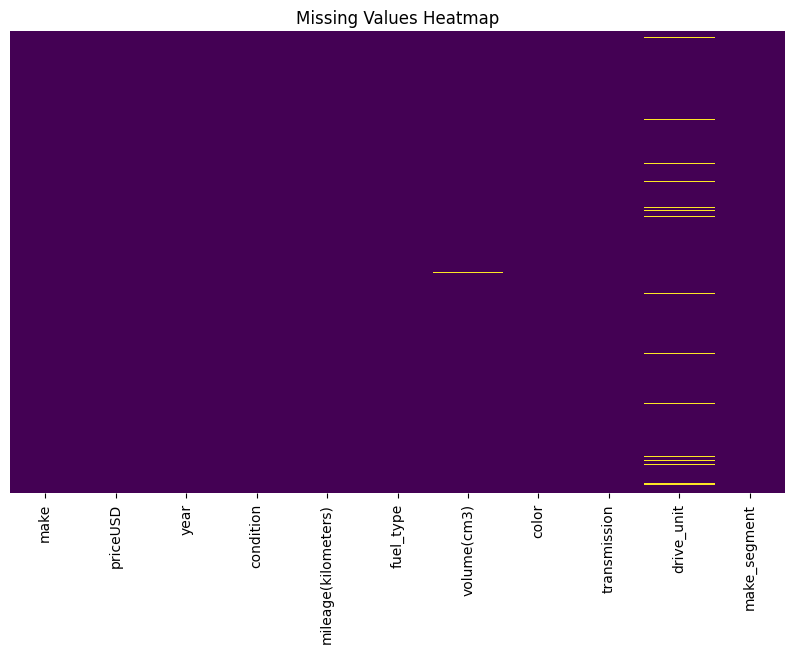

In [63]:
# None of each column
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis', yticklabels=False)
plt.title('Missing Values Heatmap')
plt.show()


In [58]:
# checking for null values
df.isnull().sum()

,0
make,0
priceUSD,0
year,0
condition,0
mileage(kilometers),0
fuel_type,0
volume(cm3),47
color,0
transmission,0
drive_unit,1874


Since, the count of null values in small in comparison to that dataset size, I will be dropping the null values from the dataset.

In [64]:
df.dropna(inplace=True)

<ipython-input-64-c64f9f573c18>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(inplace=True)


In [66]:
df.drop(columns=['make'], inplace=True)

<ipython-input-66-919388df2831>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns=['make'], inplace=True)


Label Encoding

In [67]:
from sklearn.preprocessing import LabelEncoder

cols = ['condition', 'fuel_type', 'transmission', 'color', 'drive_unit', 'make_segment']

le = LabelEncoder()

for col in cols:
    le.fit(df[col])
    df[col] = le.transform(df[col])
    print(col, df[col].unique())

condition [2 1 0]
fuel_type [1 0]
transmission [1 0]
color [ 3  0 10 11  4  1  7  8  9  5  2 12  6]
drive_unit [1 3 0 2]
make_segment [2 3 5 0 4 6 1]


<ipython-input-67-7ec955718c78>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = le.transform(df[col])
<ipython-input-67-7ec955718c78>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = le.transform(df[col])
<ipython-input-67-7ec955718c78>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing

# **Correlation Matrix Heatmap**

<Axes: >

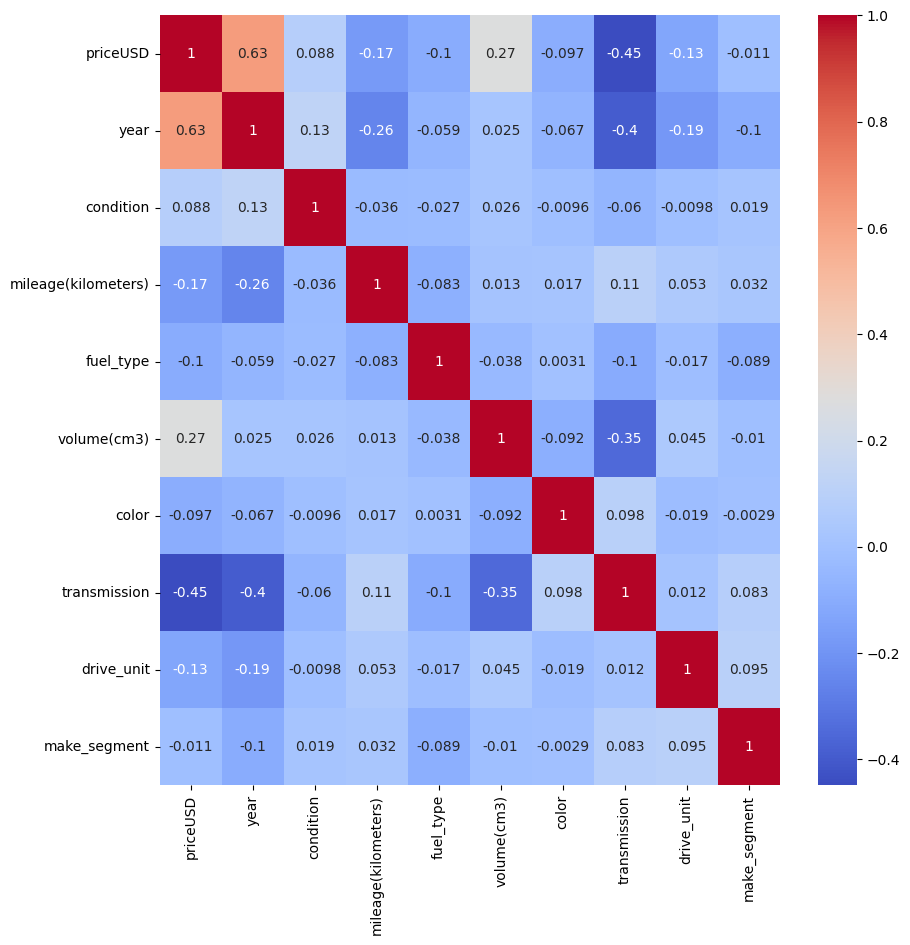

In [68]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')

# **Outlier Removal**

In [69]:
# Using Z-score to remove outliers
from scipy import stats

z = np.abs(stats.zscore(df))

threshold = 3

#columns with outliers
cols = ['year', 'mileage(kilometers)', 'volume(cm3)']

#removing outliers
df = df[(z < 3).all(axis=1)]

# **Decision Tree Regressor**

In [74]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop(columns=['priceUSD']), df['priceUSD'], test_size=0.2, random_state=42)

In [71]:
from sklearn.tree import DecisionTreeRegressor

# Decision Tree Regressor Object
dtr = DecisionTreeRegressor()

In [72]:
from sklearn.model_selection import GridSearchCV

#parameters for grid search
params = {
    'max_depth': [2,4,6,8],
    'min_samples_split': [2,4,6,8],
    'min_samples_leaf': [1,2,3,4],
    'max_features': ['auto', 'sqrt', 'log2'],
    'random_state': [0,42]
}
# Grid Search Object
grid = GridSearchCV(dtr, param_grid=params, cv=5, verbose=1, n_jobs=-1)

#fitting the grid search
grid.fit(X_train, y_train)

#best parameters
print(grid.best_params_)

Fitting 5 folds for each of 384 candidates, totalling 1920 fits
{'max_depth': 8, 'max_features': 'sqrt', 'min_samples_leaf': 3, 'min_samples_split': 2, 'random_state': 0}


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
640 fits failed out of a total of 1920.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
640 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1382, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 436, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.11/dist-packages/sklearn/uti

In [77]:
#decision tree regressor with best parameters
dtr = DecisionTreeRegressor(max_depth=8, max_features=None, min_samples_leaf=4, min_samples_split=2, random_state=0)

#fitting the model
dtr.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=8, min_samples_leaf=4, random_state=0)

In [78]:
#training score
dtr.score(X_train, y_train)

0.8689232243678456

In [79]:
#predicting the test set
y_pred = dtr.predict(X_test)

# **Model Evaluation**

In [81]:
#most important metrics
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
print('R2 Score: ', r2_score(y_test, y_pred))
print('Mean Squared Error: ', mean_squared_error(y_test, y_pred))
print('Mean Absolute Error: ', mean_absolute_error(y_test, y_pred))
print('Root Mean Squared Error: ', np.sqrt(mean_squared_error(y_test, y_pred)))

R2 Score:  0.8529954473045238
Mean Squared Error:  4704555.776616746
Mean Absolute Error:  1414.2804910704947
Root Mean Squared Error:  2168.9987959002524


# ***Feature Importance***

In [82]:
feat_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': dtr.feature_importances_})
feat_df = feat_df.sort_values(by='Importance', ascending=False)
feat_df

,Feature,Importance
0,year,0.754301
4,volume(cm3),0.200413
3,fuel_type,0.017333
6,transmission,0.010267
8,make_segment,0.009639
7,drive_unit,0.006883
2,mileage(kilometers),0.000872
5,color,0.000292
1,condition,0.000000


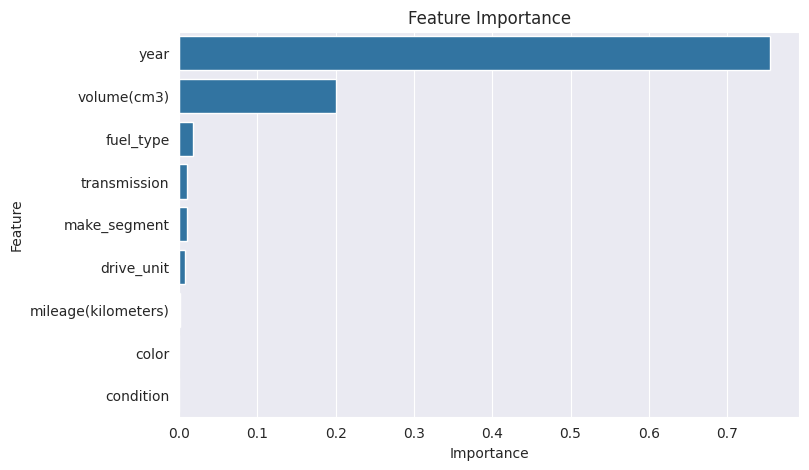

In [83]:
# Bar Plot
sns.set_style('darkgrid')
plt.figure(figsize=(8,5))
sns.barplot(x='Importance', y='Feature', data=feat_df)
plt.title('Feature Importance')
plt.show()

# **Conclusion**
The objective of this project was to predict car prices in Belarus by analyzing various features, including brand, year, engine volume, fuel type, transmission, mileage, drive unit, color, and segment.

During the exploratory data analysis, it was observed that car prices in Belarus have significantly increased since the year 2000. Cars that run on petrol and have automatic transmissions tend to be more expensive compared to diesel cars with manual transmissions. However, electric cars are distinctively more expensive than both petrol and diesel vehicles. Additionally, cars with all-wheel drive have the highest prices among all drive unit types. Among different segments, specialty cars are the most expensive, followed by luxury European, American, and Asian car segments.

To predict car prices, a Decision Tree Regressor model was implemented, achieving an accuracy of 85.29%. The analysis identified year of manufacture and engine volume as the most influential factors in determining car prices.

This study provides valuable insights into car pricing trends in Belarus and can serve as a useful tool for buyers, sellers, and market analysts. Future improvements could include incorporating additional features, optimizing the model further, and exploring other machine learning techniques to enhance predictive accuracy.